In [1]:
# Reading the Data from input file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('ADANIPORTS.csv')
df.describe()

C:\Users\S559487\AppData\Local\Temp\ipykernel_9976\290008127.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3.322000e+03,3.322000e+03,2.456000e+03,3.322000e+03,3322.000000
mean,344.114314,344.763019,351.608007,337.531969,344.239539,344.201626,344.853182,2.954564e+06,1.070144e+14,4.492259e+04,1.207441e+06,0.445899
std,192.936882,193.619992,198.617808,188.676614,193.187813,193.045886,193.841305,4.104227e+06,2.625564e+14,5.023124e+04,1.398640e+06,0.160496
min,108.000000,108.000000,110.450000,105.650000,108.000000,108.000000,108.340000,1.236600e+04,2.415857e+11,3.660000e+02,5.383000e+03,0.067000
25%,164.312500,164.850000,168.000000,161.600000,164.075000,164.312500,164.855000,7.493682e+05,1.817650e+13,2.083200e+04,3.212005e+05,0.332900
50%,324.700000,325.750000,331.275000,319.850000,325.000000,324.700000,325.765000,2.007292e+06,5.836041e+13,3.588150e+04,8.132775e+05,0.445650
75%,400.912500,401.000000,407.187500,395.000000,400.912500,400.912500,400.607500,3.636883e+06,1.158526e+14,5.336875e+04,1.605528e+06,0.555850
max,1307.450000,1310.250000,1324.000000,1270.000000,1308.000000,1307.450000,1302.150000,9.771788e+07,8.160988e+15,1.205984e+06,2.241652e+07,0.979800


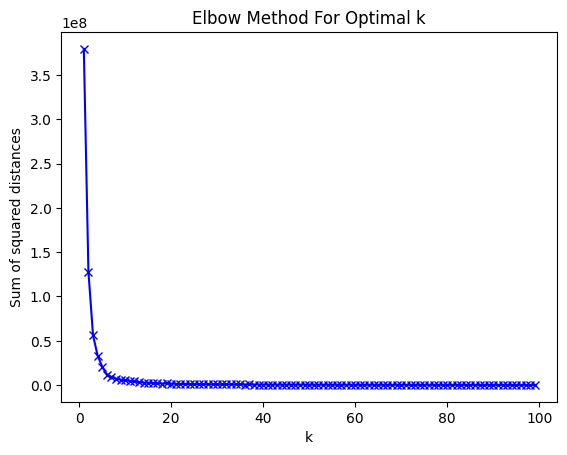

Distortion: 927524.7701013009
Average of square root:  16.70948036073348
Centroids: 
 [[ 414.84775281  421.90561798  415.4752809 ]
 [ 156.67067669  159.70507519  156.13684211]
 [ 723.44915254  736.30084746  722.06779661]
 [ 265.33290816  270.04438776  264.96836735]
 [1103.65555556 1138.85555556 1094.81666667]
 [ 549.71705882  560.01235294  547.03705882]
 [ 369.40166113  374.57275748  368.70398671]
 [ 326.53985149  331.87871287  325.58638614]
 [ 900.2875      952.00833333  889.24583333]
 [ 605.4125      622.75104167  602.83020833]
 [ 827.90238095  860.47142857  836.61666667]
 [ 229.51259843  234.07440945  228.94133858]
 [ 123.3984375   125.97285156  123.53261719]
 [1287.28       1309.5        1277.85      ]
 [ 474.47857143  485.90238095  472.03452381]
 [ 575.69180328  591.18196721  575.54098361]
 [ 287.93418803  293.14145299  287.67649573]
 [ 193.64495413  197.36513761  193.39449541]
 [ 791.55434783  806.25869565  787.59673913]
 [ 389.54583333  395.113125    388.82375   ]
 [ 664.6055555

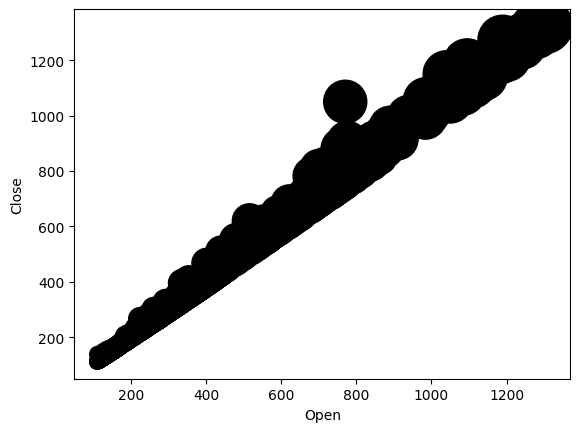

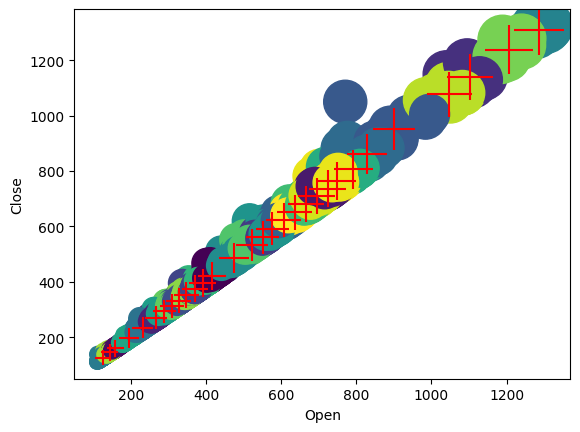

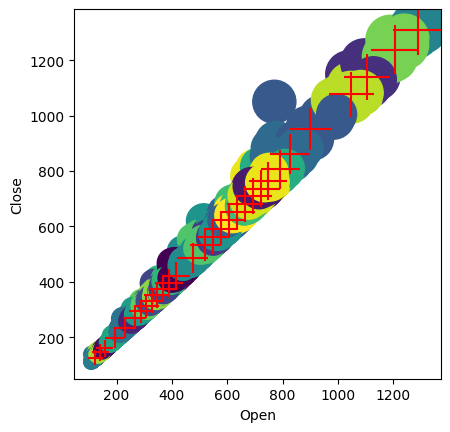

In [8]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import math

X = df[["Open", "High", "Close"]]

kmeans = KMeans(n_clusters=30)
kmeans.fit(X)

kmeans_list = []
cluster_range = range(1,100)
for k in cluster_range:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    kmeans_list.append(km.inertia_)
    
plt.plot(cluster_range, kmeans_list, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

print("Distortion:", kmeans.inertia_)
RMSavrg = math.sqrt(kmeans.inertia_ / len(X))
print("Average of square root: ", RMSavrg)
print("Centroids: \n", kmeans.cluster_centers_)
print("Assignments: ", kmeans.labels_)

plt.scatter(df['Open'], df['High'], df['Close'], color="black")
plt.xlabel("Open")
plt.ylabel("Close")
plt.show()
cluster_x = [x for [x,y,z] in kmeans.cluster_centers_]
cluster_y = [y for [x,y,z] in kmeans.cluster_centers_]
cluster_z = [z for [x,y,z] in kmeans.cluster_centers_]
plt.scatter(df['Open'], df['High'], df['Close'], c=kmeans.labels_)
plt.scatter(cluster_x, cluster_y, cluster_z, marker="+", color="red")
plt.xlabel("Open")
plt.ylabel("Close")
plt.show()

cluster_x = [x for [x,y,z] in kmeans.cluster_centers_]
cluster_y = [y for [x,y,z] in kmeans.cluster_centers_]
cluster_z = [z for [x,y,z] in kmeans.cluster_centers_]
plt.scatter(df['Open'], df['High'], df['Close'], c=kmeans.labels_)
plt.scatter(cluster_x, cluster_y, cluster_z, marker="+", color="red")
plt.xlabel("Open")
plt.ylabel("Close")
plt.axis("scaled")
plt.show()

Argmax value: 1


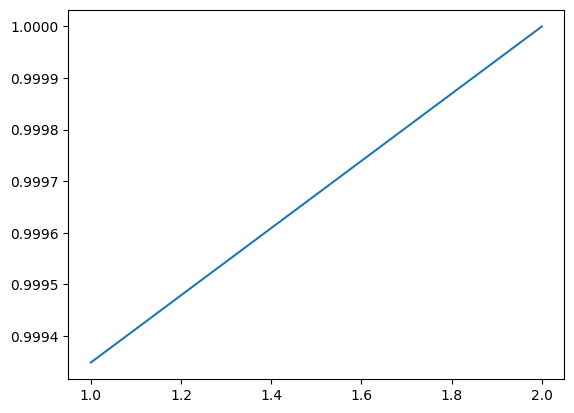

In [10]:
# Performing Dimensional Analysis
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

X = df[["Open", "High"]]
X = StandardScaler().fit_transform(X)
y = df['Close']
pca = PCA()
X   = pca.fit_transform(X)

cumulativeSums = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumulativeSums >= 0.95) + 1

print('Argmax value:',d)
import matplotlib.pyplot as plt
value = [i+1 for i in range(0,len(cumulativeSums))]
plt.plot(value, cumulativeSums)
plt.show()